In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Polynomial Curve Fitting

## Data Preparation 

In [30]:
def create_toy_data(f, sample_size, std=0.25, noise=True):
    x = np.linspace(0, 1, sample_size)
    if noise:
        y = f(x) + np.random.normal(scale=std, size=x.shape)
    else:
        y = f(x)            
    return x, y

In [31]:
def f(x):
    return np.sin(2 * np.pi * x)

In [32]:
x_train, y_train = create_toy_data(f, 10)
x_test , y_test  = create_toy_data(f, 100)
x_exact, y_exact = create_toy_data(f, 100, noise=False)

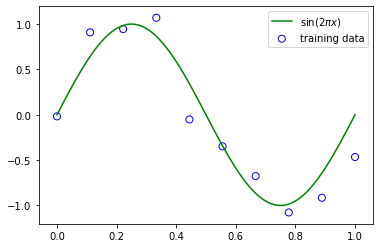

In [33]:
plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='training data')
plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
plt.legend()
plt.show()

## Regression 回归

In [34]:
class Regression(object):
    """Base class for regression 基本类
    """
    pass   

## Linear Regression 线性回归

In [35]:
class LinearRegression(Regression):
    """Linear Regression Model 线性回归模型
    y = X @ w
    """        
    def fit(self, X, y):
        """performe least square fitting
        
        Params
        ======
        X: (N, D) np.ndarray: from x = np.array()
            Polynomial feature 多项式特征
        y: (N,) np.ndarray
            Target
        """
        # np.linalg.pinv(X):inv of X
        self.w = np.linalg.pinv(X) @ y
    
    def predict(self, X):
        """make prediction given input
        
        Params
        ======
        X: (N, D) np.ndarray
        
        Returns
        =======
        y: (N,) np.ndarray
            prediction of each sample
        """
        y = X @ self.w
        return y

## Polynomial Feature

In [36]:
import itertools
import functools

class PolynormialFeature(object):
    """Polynomial features
    transforms input array with polynomial feature
    
    Examples
    ========
    Example 1
    ---------
    x = np.array([a, b])
    y = PolynormialFeature(degree=2).transform(x)
    y = [[1, a, a^2, a^3]
         [1, b, b^2, b^3]]
    
    Example 2
    ---------
    x = np.array([[a, b], 
                  [c, d]])     
    y = PolynormialFeature(degree=2).transform(x)
    y = [[1, a, b, a^2, a*b, b^2],
         [1, c, d, c^2, c*d, d^2]]    
    """
    def __init__(self, degree=2):
        """construct polynomial features
        
        Params
        ======
        degree: int
            degree of polynomials
        """
        if not isinstance(degree, int):
            raise TypeError("degree should be int")
        self.degree = degree
        
    def transform(self, x):
        """transforms input array with polynomial features
        
        Params
        ======
        x: (sample_size, n) np.ndarray
            input array
            
        Returns
        =======
        output: (sample_size, C_{n+d}^d)
        """
        if x.ndim == 1: # x:[1 2]
            x = x[:, None] # ndim += 1 x:[[1]\n[2]]
        x_t = x.transpose() # 转置 x = [[1 2]]
        features = [np.ones(len(x))] #features:[array([1., 1.])]
        for d in range(1, self.degree + 1):
            for item in itertools.combinations_with_replacement(x_t, d):
                # itertools.combinations_with_replacement('ABC',2) --> AA AB AC BB BC CC
                features.append(functools.reduce(lambda x, y: x * y, item))
                # functools.reduce(lambda x, y: x+y, [1,2,3,4,5]) calculates ((((1+2)+3)+4)+5)
        return np.asarray(features).transpose() 
        # np.assarray():convert a list into an array. eg: a:[1,2] --> np.asarray(a):array([1,2])              

In [37]:
x = np.array([1, 2])
feature = PolynormialFeature(2).transform(x)
print(feature)

[[1. 1. 1.]
 [1. 2. 4.]]


In [38]:
x = np.array([[1, 2],[2, 3]])
feature = PolynormialFeature(2).transform(x)
print(feature)

[[1. 1. 2. 1. 2. 4.]
 [1. 2. 3. 4. 6. 9.]]


## Curve Fitting

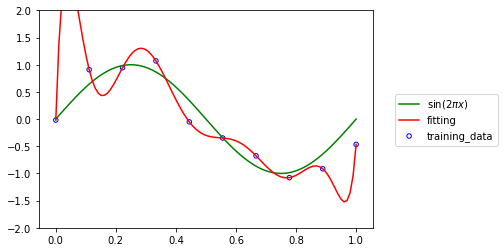

In [47]:
feature = PolynormialFeature(9)
X_train = feature.transform(x_train)
X_test  = feature.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)
y = model.predict(X_test)
    
plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=20, label='training_data')
plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
plt.plot(x_test , y      , c='r', label='fitting')
plt.ylim(-2, 2)
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2)
plt.show()

[-0.06267972]
[ 0.82208595 -1.76953135]
[-1.01775398e-02  9.17294362e+00 -3.89548064e-01 -1.44038519e+02
  3.46832672e+02 -3.17379365e+02  1.05352798e+02]
[-1.74589201e-02  1.70475898e+02 -3.58658216e+03  3.07396780e+04
 -1.37937775e+05  3.58508525e+05 -5.60000280e+05  5.18841679e+05
 -2.62799120e+05  5.60629516e+04]


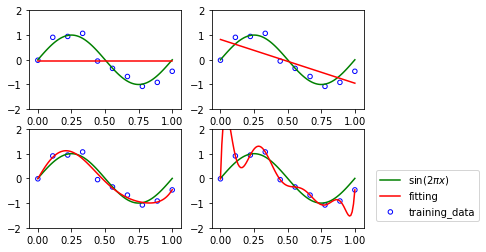

In [58]:
for i, degree in enumerate([0, 1, 6, 9]):
    plt.subplot(2, 2, i+1)
    
    feature = PolynormialFeature(degree)
    X_train = feature.transform(x_train)
    X_test  = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    print(model.w)
    
    plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=20, label='training_data')
    plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
    plt.plot(x_test , y      , c='r', label='fitting')
    plt.ylim(-2, 2)
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2)# legend位置
plt.show()

## Training and testing error

In [101]:
def rmse(a, b):
    """Rooted Mean Squared Error
    
    Params:
    ======
    a: (n,) np.ndarray
    b: (n,) np.ndarray
    """
    return np.sqrt(np.mean(np.square(a - b)))

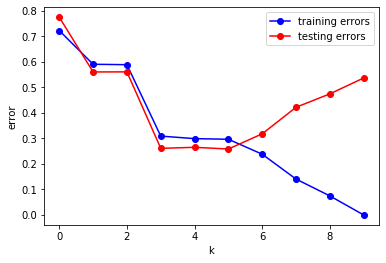

In [155]:
errors_train = []
errors_test  = []

for i in range(10):
    feature = PolynormialFeature(i)
    X_train = feature.transform(x_train)
    X_test  = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y = model.predict(X_test)
    errors_train.append(rmse(model.predict(X_train), y_train))
    errors_test.append (rmse(model.predict(X_test ), y_test ))
    
plt.plot(errors_train, 'o-', c='b', label='training errors')
plt.plot(errors_test , 'o-', c='r', label='testing errors')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()


plt.show()

## Ridge Regression - Regularization
岭回归 - 正则化

In [19]:
class RidgeRegression(Regression):
    """Ridge regression
    w^* = argmin \|t - X @ w\|^2 + alpha * \|w\|^2
    """
    def __init__(self, alpha=1.):
        self.alpha = alpha
        
    def fit(self, X, y):
        """MAP estimation of parameter
        
        Params
        ======
        X: (N, D) np.ndarray
            Polynomial features
        y: (N,) np.ndarray
            Target
        """
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ y)  
        # np.linalg.solve(A,b)
        
    def predict(self, X):
        """make prediction given input
        
        Params
        ======
        X: (N, D) np.ndarray
            samples to predict their output
        
        Returns
        =======
        y: (N,) np.ndarray
            prediction of each sample
        """
        y = X @ self.w
        return y

[  0.34994297   5.5196171  -11.74451669  -3.65220262   2.7174529
   5.094607     4.5985461    2.40804253  -0.66777277  -4.12987293]


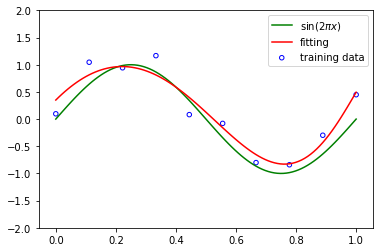

In [38]:
feature = PolynormialFeature(9)
X_train = feature.transform(x_train)
X_test  = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)
print(model.w)

plt.scatter(x_train, y_train, fc='none', ec='b', s=20, label='training data')
plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
plt.plot(x_test , y, c='r', label='fitting')
plt.ylim(-2, 2)
plt.legend()
plt.show()